In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


In [2]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.shape

(973, 15)

In [5]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

<Axes: >

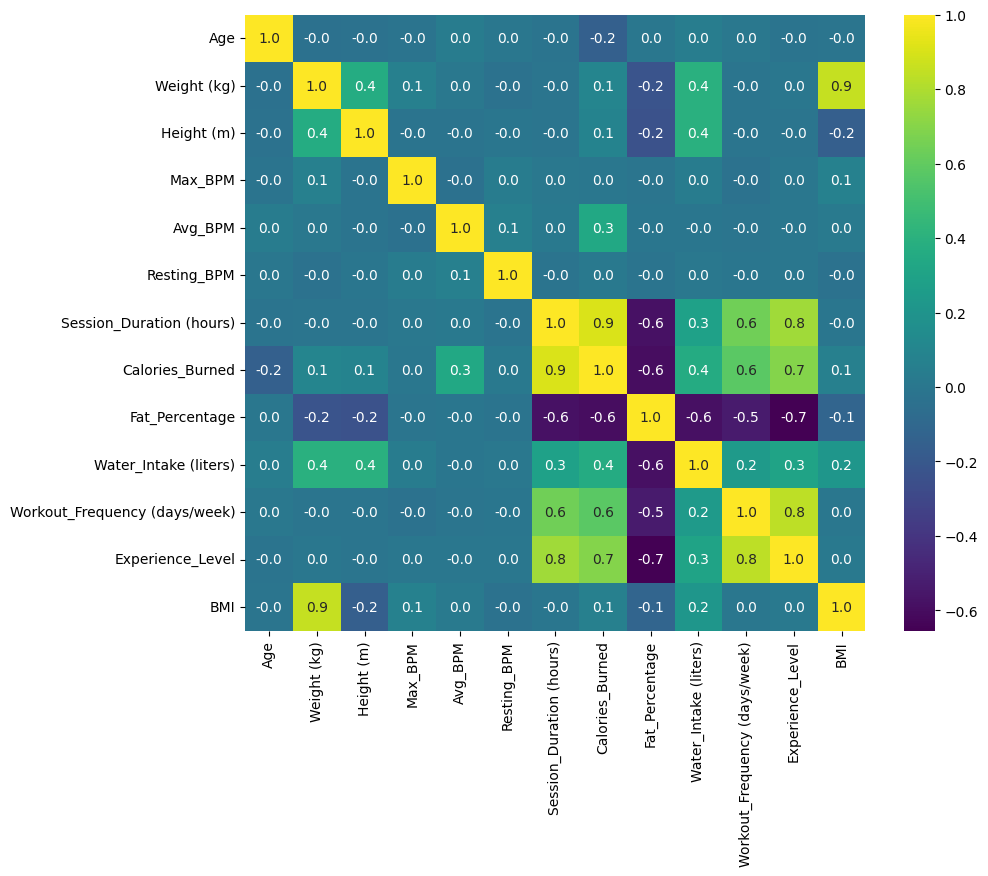

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt = '.1f', cmap = 'viridis')

### Key Insights:
BMI and Weight (0.9): There's a strong positive correlation between BMI and Weight. This makes sense as BMI is partly calculated using weight.

Calories Burned and Session Duration (0.9): A high correlation between Calories_Burned and Session_Duration suggests that the longer a workout session lasts, the more calories are burned.

Workout Frequency and Experience Level (0.8): The positive correlation between Workout_Frequency and Experience_Level indicates that more experienced individuals tend to work out more frequently.

Calories Burned and Workout Frequency (0.7): There is a significant positive relationship between Calories_Burned and Workout_Frequency, showing that more frequent workouts lead to higher calories burned.

Negative Correlations:

Fat Percentage is negatively correlated with Workout Frequency (-0.5) and Calories Burned (-0.6), suggesting that people who work out more frequently and burn more calories tend to have lower fat percentages.
Session Duration and Fat Percentage (-0.6): Longer session durations are associated with lower fat percentages.
Water Intake and Weight (0.4): Moderate correlation suggests that individuals with higher body weight tend to consume more water.

No Significant Correlation: Some variables, such as Height and Max BPM, show little to no correlation with other variables, indicating their independence in this dataset.

# Visualization

In [9]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(exclude = ['object'])

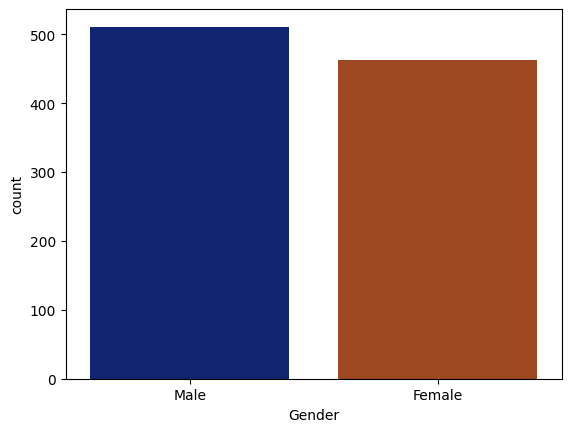

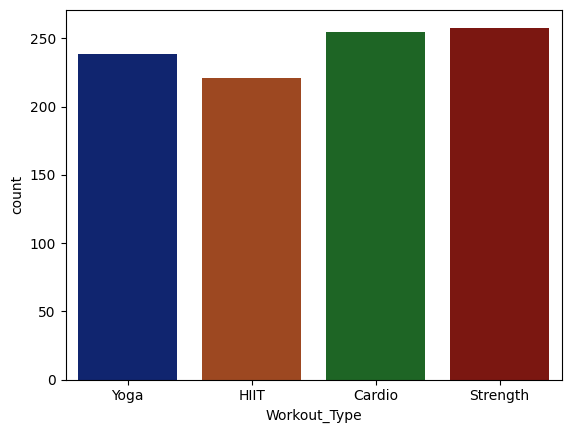

In [10]:
for col in df_cat.columns:
    sns.countplot(x = col, data = df, palette = 'dark')
    plt.show()

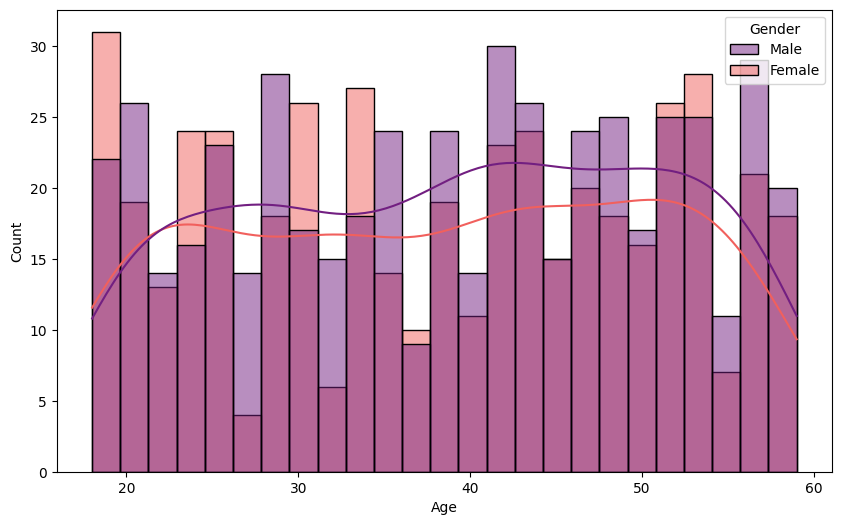

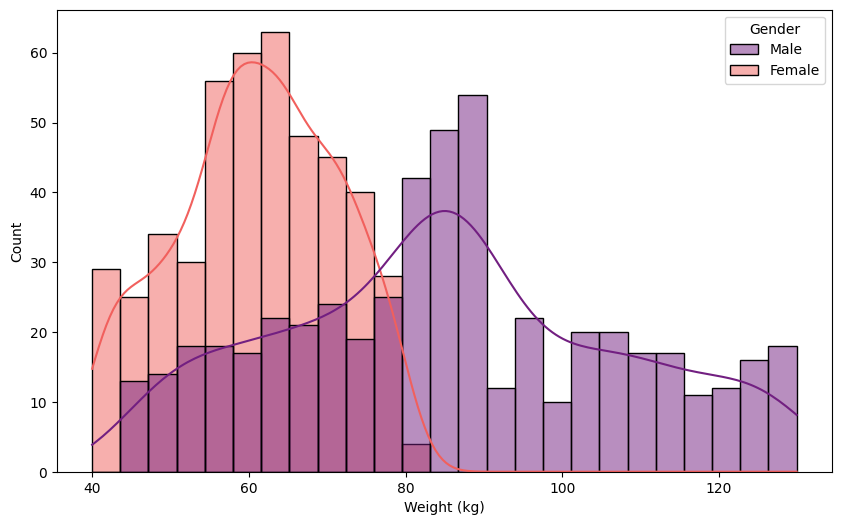

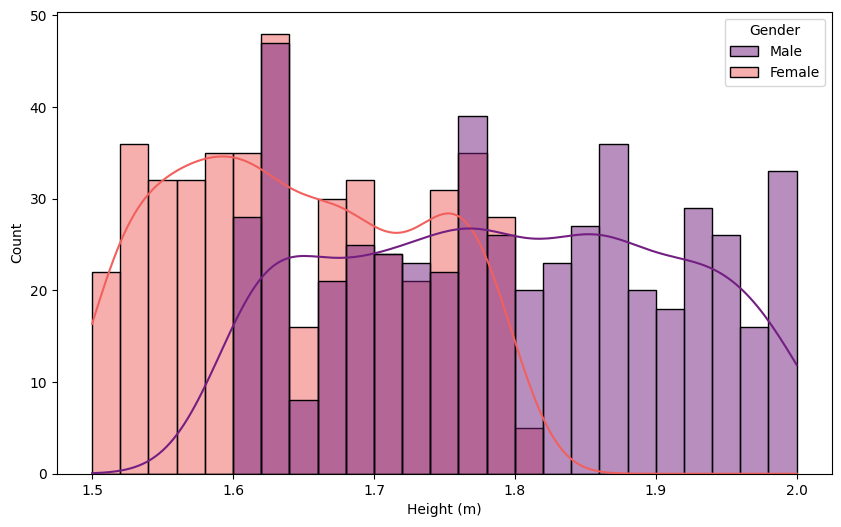

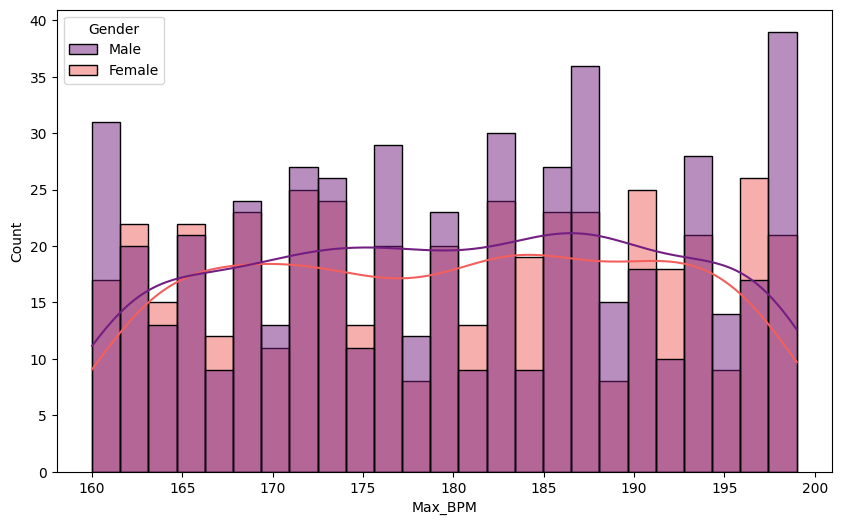

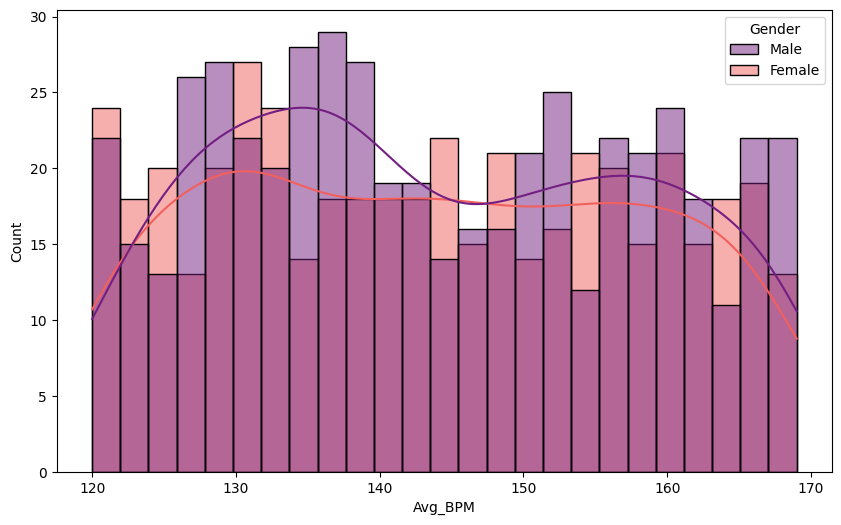

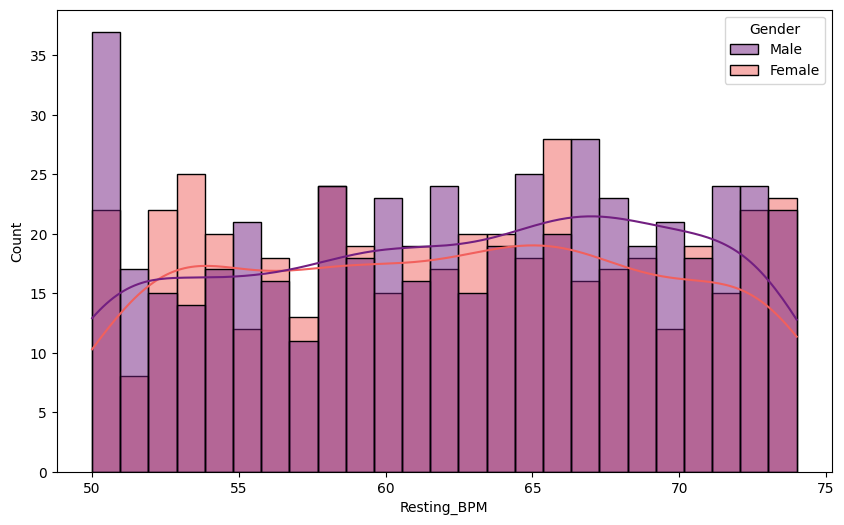

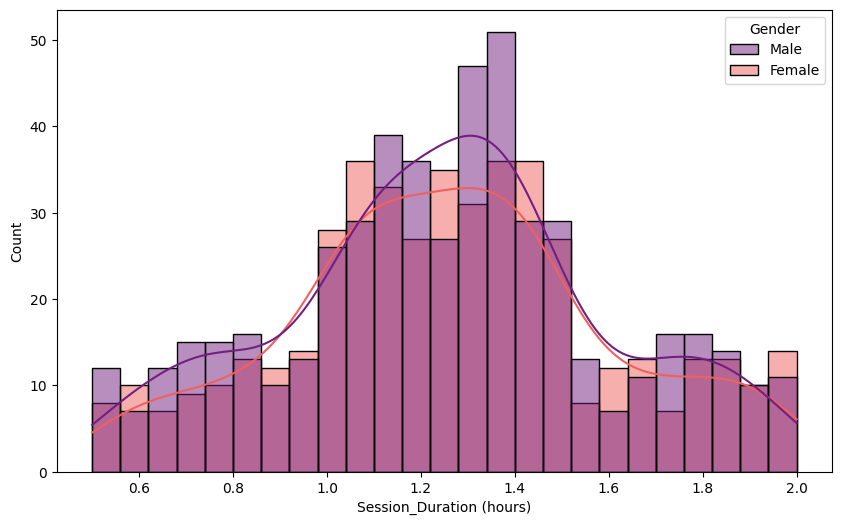

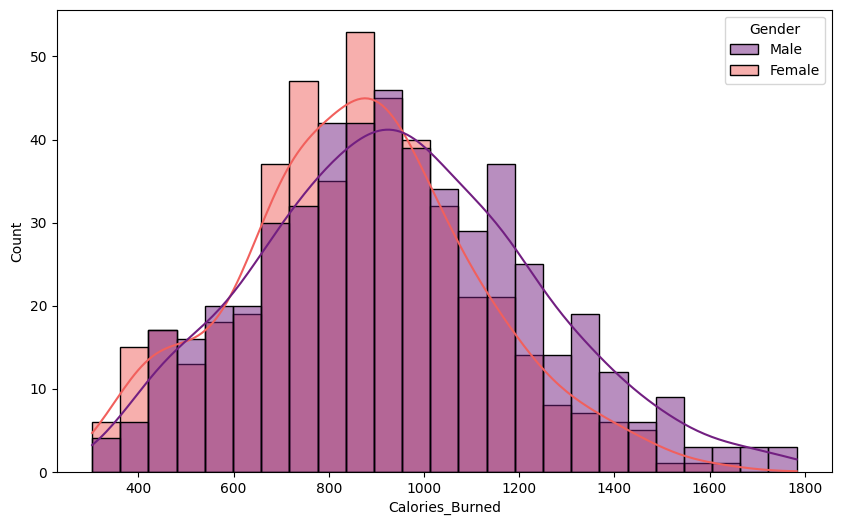

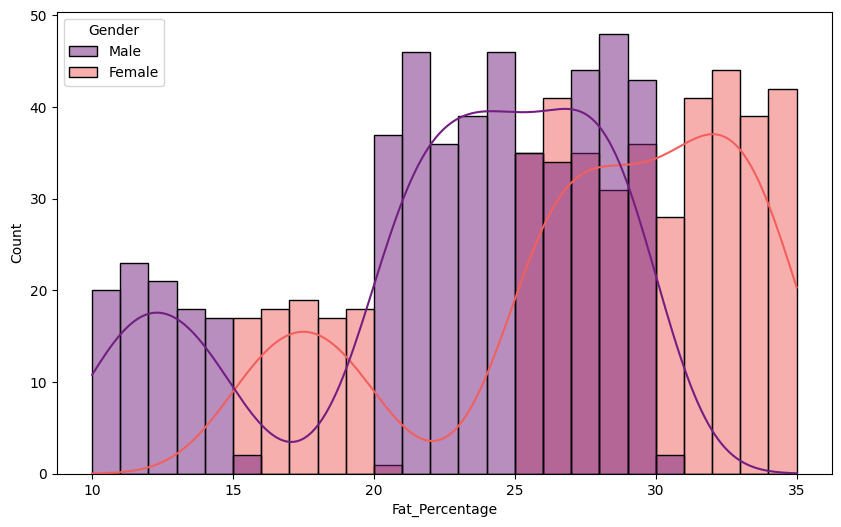

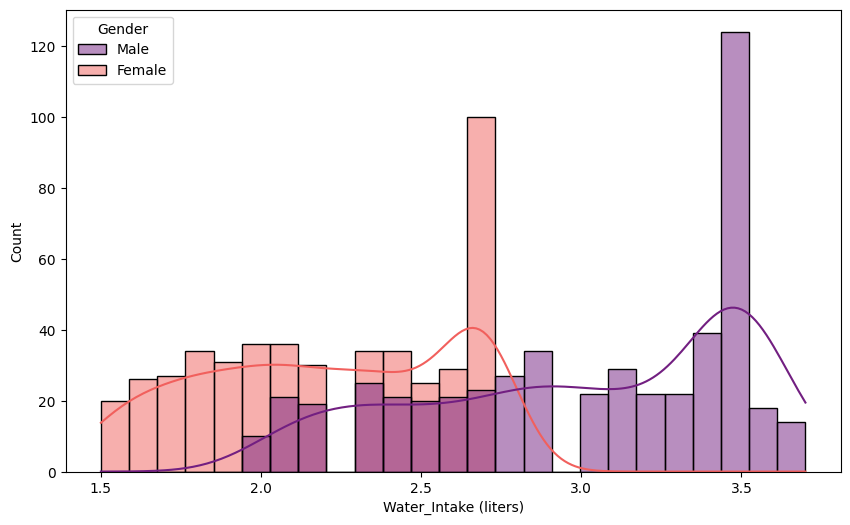

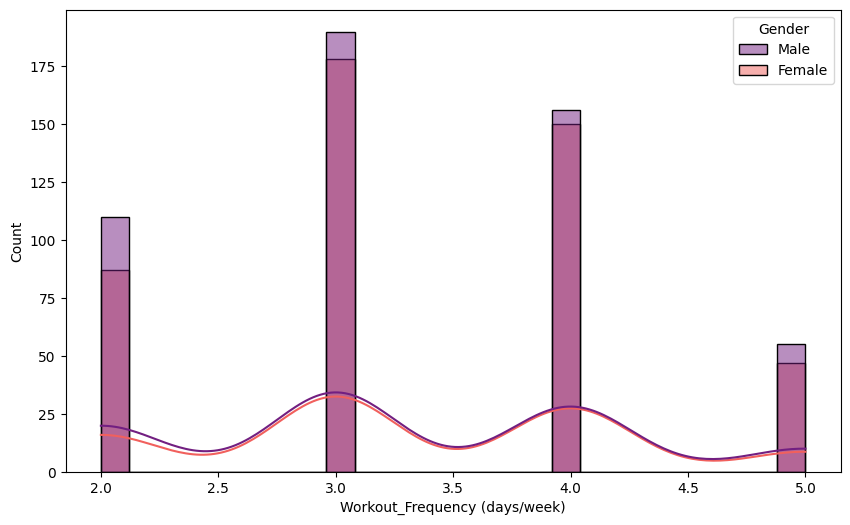

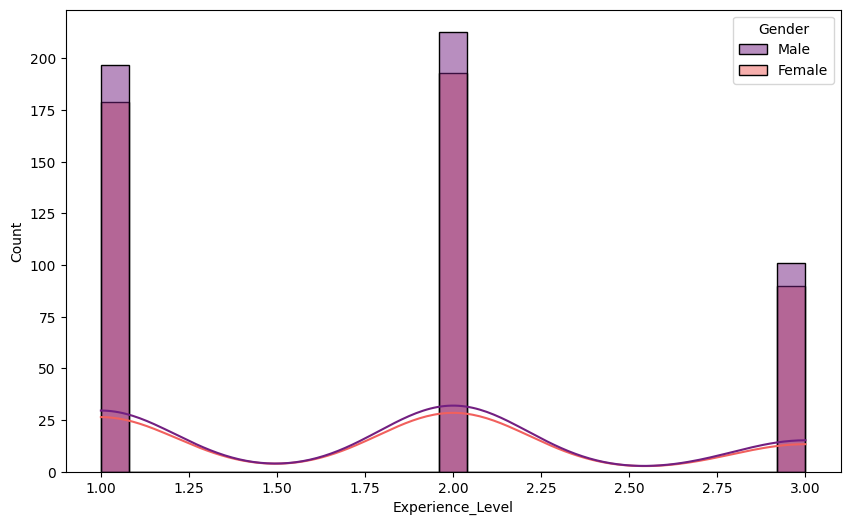

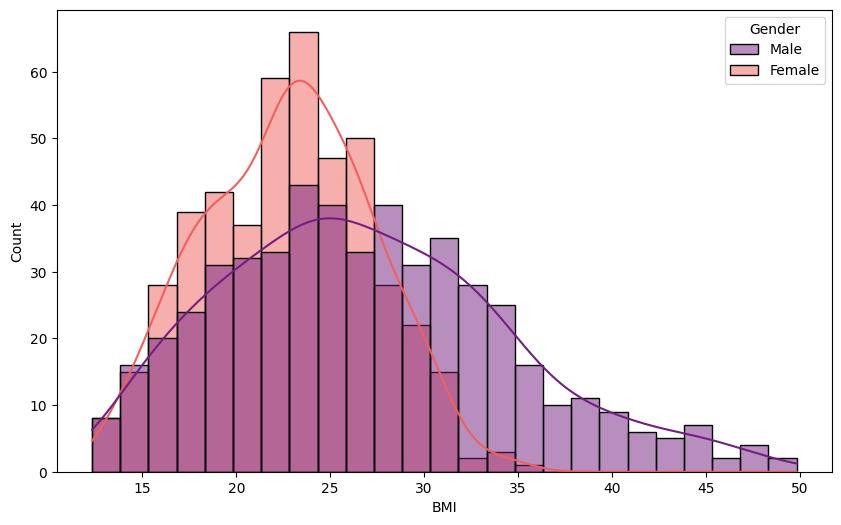

In [11]:
for col in df_num:
    plt.figure(figsize=(10,6))
    sns.histplot(x = col, data = df, kde = True, bins = 25, palette = 'magma', hue = 'Gender')
    plt.show()

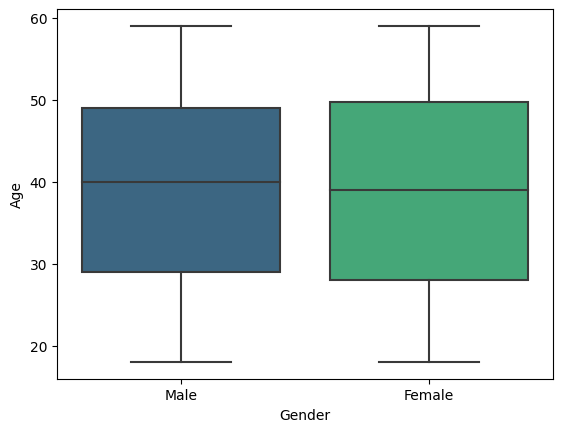

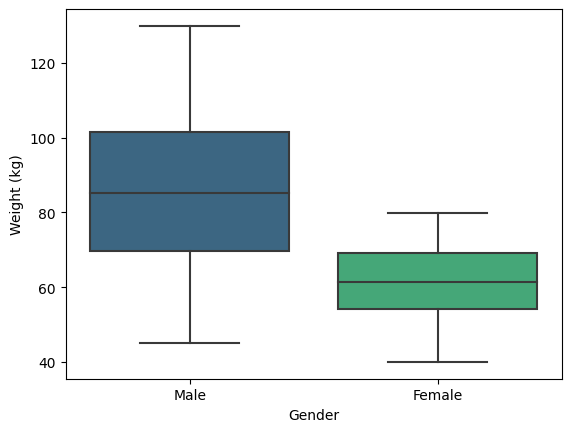

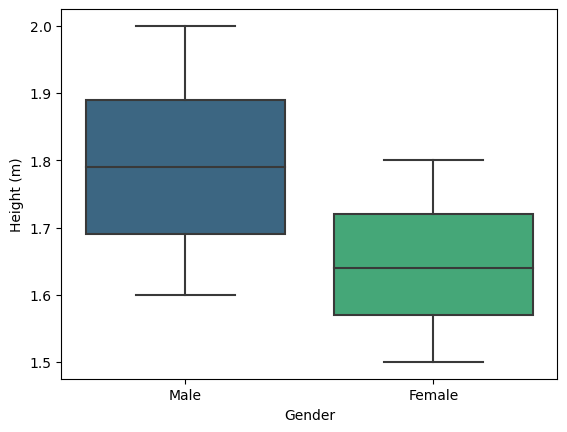

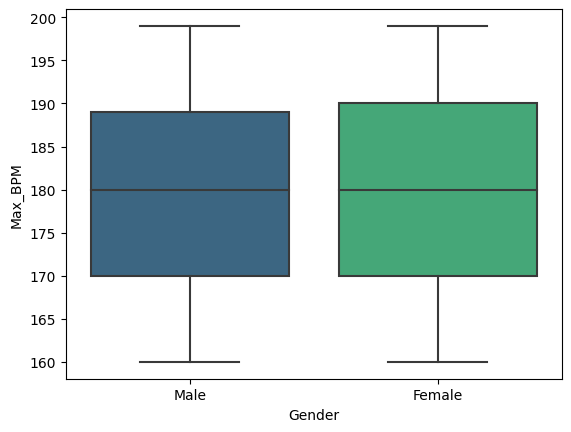

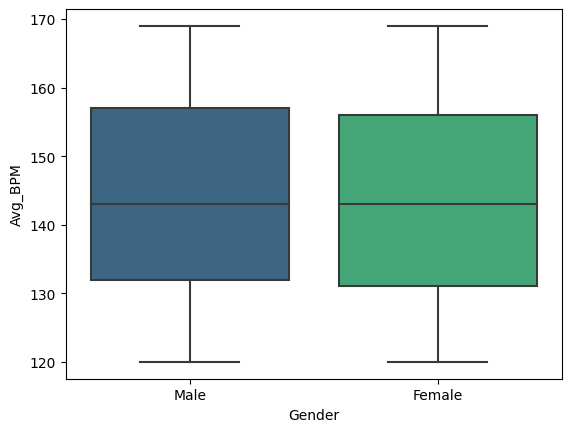

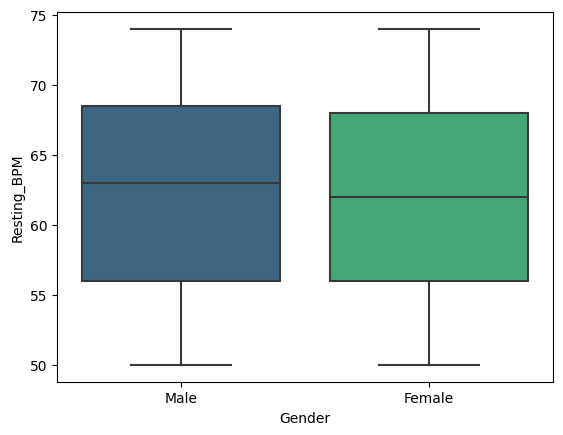

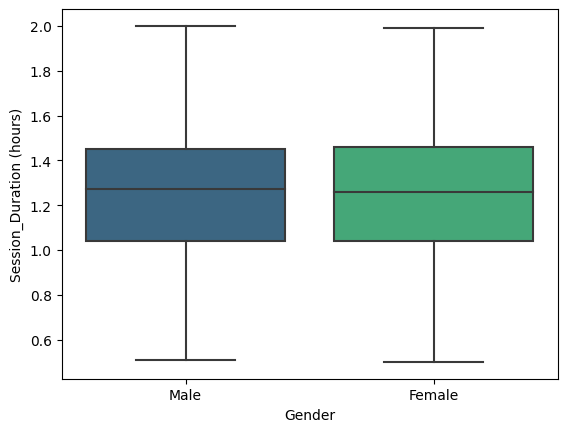

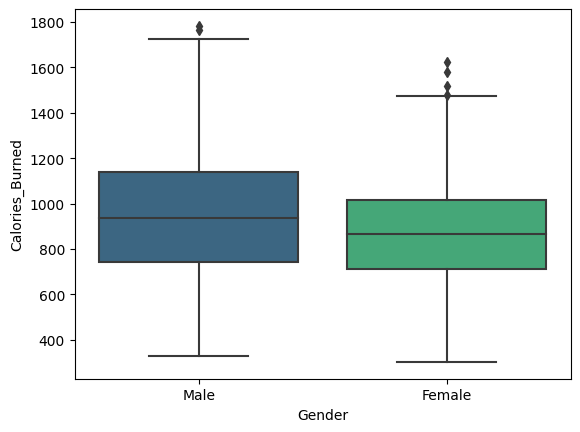

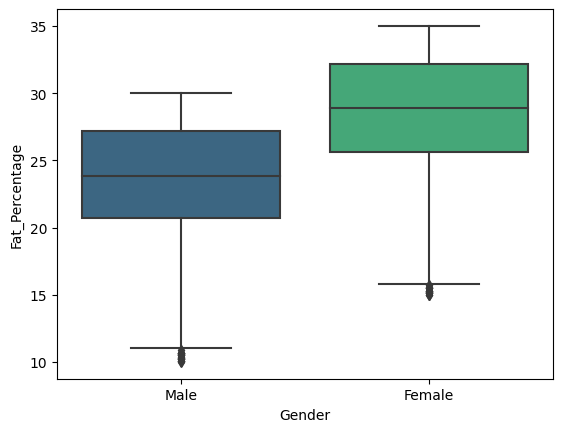

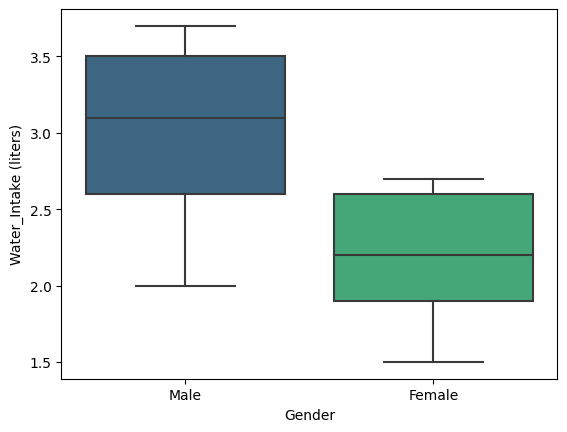

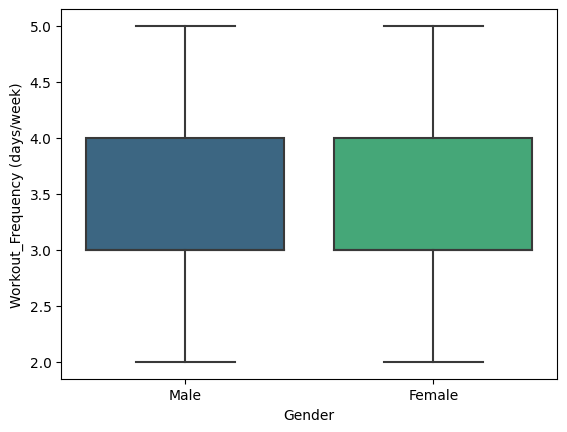

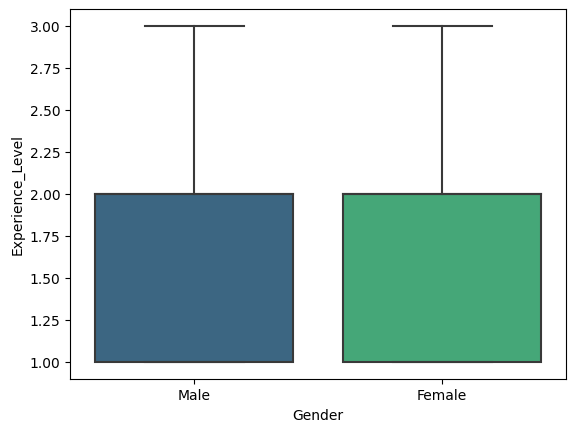

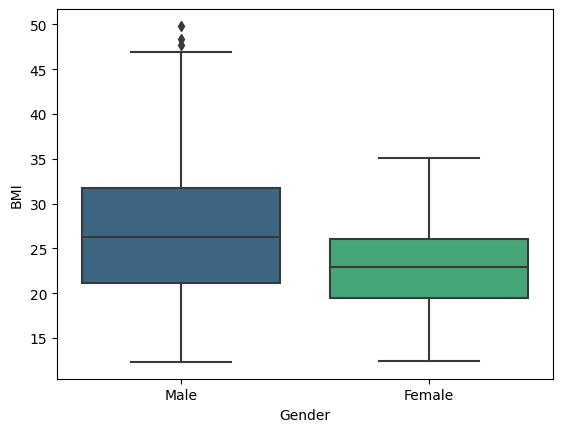

In [12]:
for col in df_num.columns:
    sns.boxplot(x = 'Gender', y = col, data =df ,palette = 'viridis')
    plt.show()

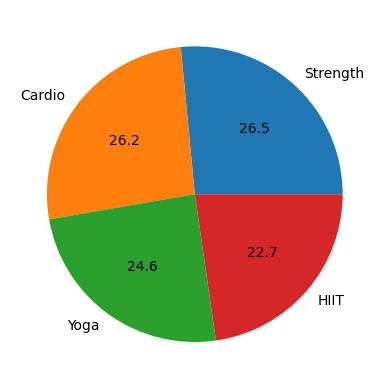

In [13]:
df.Workout_Type.value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)
plt.show()

In [14]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

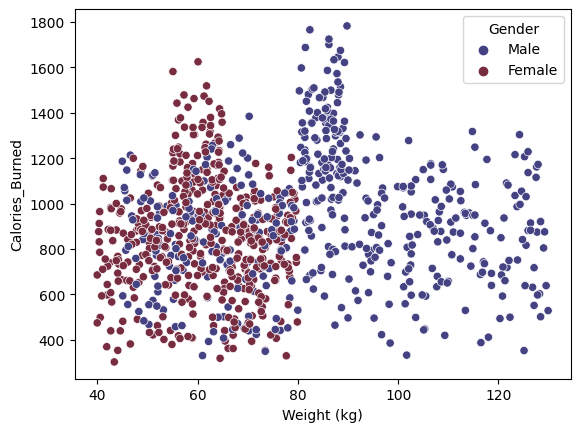

In [15]:
sns.scatterplot(x = 'Weight (kg)', y = 'Calories_Burned', data = df, hue = 'Gender', palette = 'icefire')
plt.show()

In [16]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
le = LabelEncoder()
scaler = StandardScaler()

In [19]:
x = df.drop('Calories_Burned', axis = 1)
y = df['Calories_Burned']

In [20]:
x_cat = x.select_dtypes(include = ['object'])
x_num = x.select_dtypes(exclude = ['object'])

In [21]:
print(x_cat.columns)
print(x_num.columns)

Index(['Gender', 'Workout_Type'], dtype='object')
Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [22]:
for col in x_cat.columns:
    x[col] = le.fit_transform(x[col])

In [23]:
for col in x_num.columns:
    x[col] = scaler.fit_transform(x[[col]])

In [24]:
x.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,1.422343,1,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,3,-1.978321,1.455967,0.743295,1.609784,0.794278
1,0.600965,0,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,1,1.426301,-0.877898,0.743295,0.257176,1.064652
2,-0.548964,0,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,0,1.346380,-0.544488,0.743295,0.257176,-0.030361
3,-1.123928,1,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,2,0.611110,-0.877898,-0.352502,-1.095432,-0.976669
4,-0.056137,1,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,2,0.675047,0.289035,-0.352502,-1.095432,-1.580503


# Predictive Modelling

In [25]:
y

0      1313.0
1       883.0
2       677.0
3       532.0
4       556.0
        ...  
968    1364.0
969    1260.0
970     929.0
971     883.0
972     542.0
Name: Calories_Burned, Length: 973, dtype: float64

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
y_train

967    1035.0
365     768.0
559     672.0
33      816.0
31      654.0
        ...  
106     424.0
270     952.0
860     911.0
435     914.0
102     805.0
Name: Calories_Burned, Length: 778, dtype: float64

In [28]:
import statsmodels.api as sm

# Assuming `X` is your feature matrix (encoded and standardized), and `y` is your target variable

# Step 1: Add a constant (intercept) to the feature matrix
x_train_const = sm.add_constant(x_train)  # Adds the intercept
x_test_const = sm.add_constant(x_test)  # Adds the intercept

# Step 2: Fit the OLS model
ols_model = sm.OLS(y_train, x_train_const).fit()

# Step 3: Output the summary of the model
print(ols_model.summary())

# Optional: Predict using the model if needed
y_pred = ols_model.predict(x_test_const)

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2527.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:36:56   Log-Likelihood:                -3953.6
No. Observations:                 778   AIC:                             7937.
Df Residuals:                     763   BIC:                             8007.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Statistically Significant Features:
- Age (p-value = 0.000)
- Gender (p-value = 0.000)
- Height (m) (p-value = 0.033)
- Avg_BPM (p-value = 0.000)
- Resting_BPM (p-value = 0.002)
- Session_Duration (hours) (p-value = 0.000)
- BMI (p-value = 0.046)

### Here’s a business interpretation for each significant variable:

- Age (Coefficient = -40.38, p-value = 0.000):

Interpretation: For each year increase in age, the outcome decreases by 40.38 units. In a fitness or health context, this could mean that older individuals are expected to have a lower health score or performance metric. This highlights the importance of tailoring fitness or wellness programs according to age groups. Businesses could target age-appropriate fitness solutions to mitigate this decline.

- Gender (Coefficient = 82.81, p-value = 0.000):

Interpretation: Being of a certain gender (perhaps male, assuming gender is binary-coded) increases the outcome by 82.81 units. This suggests significant differences in health or fitness performance based on gender. Businesses may need to offer gender-specific products or services, such as workout plans or health programs, that consider these biological differences.

- Height (m) (Coefficient = 14.03, p-value = 0.033):

Interpretation: For every meter increase in height, the outcome increases by 14.03 units. This could indicate that taller individuals are likely to perform better in certain physical activities or health metrics. Fitness centers or wellness platforms might incorporate height-based customization in their services, such as exercise routines suited for different body types.

- Avg_BPM (Coefficient = 88.30, p-value = 0.000):

Interpretation: For each unit increase in average beats per minute (BPM), the outcome increases by 88.30 units. This suggests that a higher average heart rate correlates with a better outcome. Businesses could use this information to offer heart rate monitoring devices and integrate personalized fitness coaching, emphasizing the importance of maintaining an optimal heart rate during workouts.

- Resting_BPM (Coefficient = 4.42, p-value = 0.002):

Interpretation: For each unit increase in resting BPM, the outcome increases by 4.42 units. While the effect is smaller compared to Avg_BPM, this could still indicate a link between cardiovascular health and fitness outcomes. Offering heart-health-focused wellness programs could be valuable for businesses targeting health-conscious individuals.

- Session_Duration (hours) (Coefficient = 244.45, p-value = 0.000):

Interpretation: For each additional hour of workout session duration, the outcome increases by 244.45 units. This suggests a strong positive impact of workout duration on health or fitness outcomes. Fitness companies might use this data to promote longer sessions or offer incentives for maintaining consistent, extended workout durations.

- BMI (Coefficient = 22.84, p-value = 0.046):

Interpretation: For each unit increase in BMI, the outcome increases by 22.84 units. BMI might be acting as a proxy for muscle mass or physical fitness in this context. Businesses may use this to target individuals based on BMI, offering personalized fitness plans or products based on body composition.

### Summary for Business Strategy:
Targeting Age and Gender: Businesses can develop age- and gender-specific fitness and wellness programs that cater to different needs. For example, gyms might offer different fitness regimes for older adults or create marketing campaigns highlighting the different benefits for men and women.

Leveraging Heart Health: The strong link between heart rate and fitness performance can be utilized by businesses that offer wearable technology, promoting the use of heart rate monitors or fitness trackers to optimize workouts and track progress.

Promoting Workout Duration: Highlighting the benefits of extended workout sessions can help businesses create challenges, loyalty programs, or apps that encourage users to maintain longer, consistent workout routines.

BMI and Body Composition: Businesses in the fitness or health sector can provide services tailored to different BMI ranges, helping individuals achieve optimal health outcomes based on their body composition.

In [29]:
y_test.head(5)

199     929.0
538    1401.0
174     925.0
464    1155.0
66     1587.0
Name: Calories_Burned, dtype: float64

# Evaluating Accuracy

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mse = mean_squared_error(y_test,y_pred)
print('Mean square error = ',mse)

Mean square error =  1639.9102084997287


In [32]:
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error = ',mae)

Mean absolute error =  30.216457302852824


In [33]:
rmse = mse**0.5
rmse
print('Root Mean square error = ',rmse)

Root Mean square error =  40.49580482592893
